In [7]:
import tensorflow as tf
from numpy import diag
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

### Task 1. Setting Up (make the function for creating NN with arbitrary number of layers)

In [18]:
def xavier(n_in, n_out):
    init_range = 4*math.sqrt(6.0/(n_in + n_out))
    return tf.random_uniform([n_in, n_out], -init_range, init_range)

def make_net(n_in, n_out, hid_sizes, activ_hid, activ_out, X):
    W = tf.Variable(xavier(n_in, hid_sizes[0]))
    b = tf.Variable(np.zeros(hid_sizes[0], dtype="float32"))
    hidden = activ_hid(tf.matmul(X, W) + b)
    for i in range(1, len(hid_sizes)-1):
        W = tf.Variable(xavier(hid_sizes[i-1], hid_sizes[i]))
        b = tf.Variable(np.zeros(hid_sizes[i], dtype="float32"))
        hidden = activ_hid(tf.matmul(hidden, W) + b)    
    W = tf.Variable(xavier(hid_sizes[-2], hid_sizes[-1]))
    b = tf.Variable(np.zeros(hid_sizes[-1], dtype="float32"))
    return activ_out(tf.matmul(hidden, W) + b)
    
    
Xi = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0], [1.0,1.0]])
Yi = np.array([[0.0], [1.0], [1.0], [0.0]])
learning_rate = 0.01
epochs = 30000

n_in = 2
n_out = 1
X = tf.placeholder("float32", [None, n_in])
Y = tf.placeholder("float32", [None, n_out])
out = make_net(n_in, n_out, [10,5,3], tf.nn.sigmoid, tf.nn.sigmoid, X)
loss = tf.reduce_mean(tf.square(Y - out))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    for i in range(epochs):
        perm = np.random.permutation(range(4))
        sess.run(train, feed_dict={X: Xi[perm], Y: Yi[perm]})
        if i%10000 == 0:
            print("epoch %s"% (i))
            print(Yi[0], sess.run(out, feed_dict={X:[Xi[0]]}))
            print(Yi[1], sess.run(out, feed_dict={X:[Xi[1]]}))
            print(Yi[2], sess.run(out, feed_dict={X:[Xi[2]]}))
            print(Yi[3], sess.run(out, feed_dict={X:[Xi[3]]}))
            print(sess.run(loss,feed_dict={X: Xi[perm], Y: Yi[perm]}))

epoch 0
[ 0.] [[ 0.05029192  0.31697556  0.81598675]]
[ 1.] [[ 0.03818112  0.56280208  0.70090699]]
[ 1.] [[ 0.09215762  0.64793426  0.84321618]]
[ 0.] [[ 0.0960271   0.73154879  0.76762336]]
0.340073
epoch 10000
[ 0.] [[ 0.00104507  0.00069627  0.00132268]]
[ 1.] [[ 0.99838436  0.9990682   0.99854445]]
[ 1.] [[ 0.99840337  0.99907613  0.99855989]]
[ 0.] [[ 0.00182455  0.00102691  0.0013974 ]]
1.72805e-06
epoch 20000
[ 0.] [[  9.12655159e-05   6.41670558e-05   1.12249516e-04]]
[ 1.] [[ 0.99986458  0.99992096  0.99987841]]
[ 1.] [[ 0.99986565  0.99992144  0.99987936]]
[ 0.] [[  1.51911881e-04   8.39125423e-05   1.15453819e-04]]
1.22201e-08


### Toy dataset

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


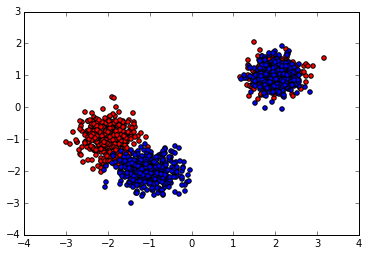

In [12]:
means = [(-2,2),(-1,2),(-1,1),(-2,1),(1,2),(2,2),(2,1),(1,1), (-2,-1),(-1,-1),(-1,-2),(-2,-2),(1,-1),(2,-1),(2,-2),(1,-2)]
cov = [diag([0.1,0.1]), diag([0.15,0.07]), diag([0.15,0.07]), diag([0.1,0.1]),diag([0.1,0.1]), diag([0.15,0.07]), diag([0.15,0.07]), diag([0.1,0.1]),diag([0.1,0.1]), diag([0.15,0.07]), diag([0.15,0.07]), diag([0.1,0.1]),diag([0.1,0.1]), diag([0.15,0.07]), diag([0.15,0.07]), diag([0.1,0.1])]

X = []
y = [i%2 for i in range(len(means))]
for i in range(len(means)):
    X.append(np.random.multivariate_normal(means[i], cov[i], 400))

c1 = [X[i] for i in range(len(y)) if i%2 == 0]
c2 = [X[i] for i in range(len(y)) if i%2 == 1]

plt.scatter(c1[:][0], c1[:][1], c='r')
plt.scatter(c2[:][0], c2[:][1], c='b')